In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2 as cv

In [2]:
base_dir = "/kaggle/input/jute-pest/Jute_Pest_Dataset/Jute_Pest_Dataset"
batch_size = 32
img_height = 224
img_width = 224

train_dir = f'{base_dir}/train'
val_dir = f'{base_dir}/val'
test_dir = f'{base_dir}/test'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# Save the class names for later use
class_names = train_ds.class_names

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [3]:
for images, labels in train_ds.take(1):  # Taking a single batch
    print(images.numpy().shape)  # Accessing the feature tensors (images)
    print(labels.numpy())  # Accessing the integer labels
    print([class_names[label] for label in labels.numpy()])  # Convert integer labels to class names

(32, 224, 224, 3)
[ 9  9  6  4 15  9  2  2 11  7  6 15  6 11 15  8  7  7 12 13 13  9 14  6
 10  8 13 16  0  7  2  5]
['Jute Stem Weevil', 'Jute Stem Weevil', 'Jute Red Mite', 'Jute Aphid', 'Termite odontotermes (Rambur)', 'Jute Stem Weevil', 'Cutworm', 'Cutworm', 'Mealybug', 'Jute Semilooper', 'Jute Red Mite', 'Termite odontotermes (Rambur)', 'Jute Red Mite', 'Mealybug', 'Termite odontotermes (Rambur)', 'Jute Stem Girdler', 'Jute Semilooper', 'Jute Semilooper', 'Pod Borer', 'Scopula Emissaria', 'Scopula Emissaria', 'Jute Stem Weevil', 'Termite', 'Jute Red Mite', 'Leaf Beetle', 'Jute Stem Girdler', 'Scopula Emissaria', 'Yellow Mite', 'Beet Armyworm', 'Jute Semilooper', 'Cutworm', 'Jute Hairy']


In [4]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomContrast(0.1)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [12]:
Model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Dropout(0.5),
            keras.layers.Flatten(),
            keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(17, activation='softmax')
])   

In [13]:
model = Model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,910,481 (91.21 MB)

 Trainable params: 23,910,033 (91.21 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.2013 - loss: 4.0185 - val_accuracy: 0.3462 - val_loss: 3.7787
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.4027 - loss: 3.4834 - val_accuracy: 0.4213 - val_loss: 3.8295
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.4926 - loss: 3.4575 - val_accuracy: 0.3075 - val_loss: 4.4780
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.5912 - loss: 3.5620 - val_accuracy: 0.4407 - val_loss: 4.4733
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.6269 - loss: 3.9999 - val_accuracy: 0.4068 - val_loss: 5.3353
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.7120 - loss: 4.3136 - val_accuracy: 0.4988 - val_loss: 5.5568
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.7837 - loss: 4.4787 - val_accuracy: 0.5278 - val_loss: 5.8847
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.7986 - loss: 4.8554 - val_acc

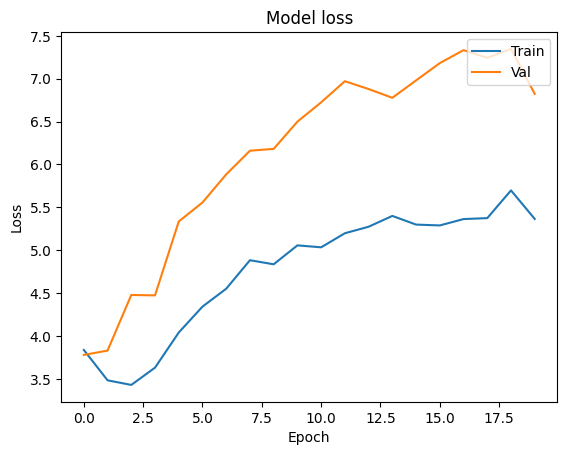

In [15]:
# plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

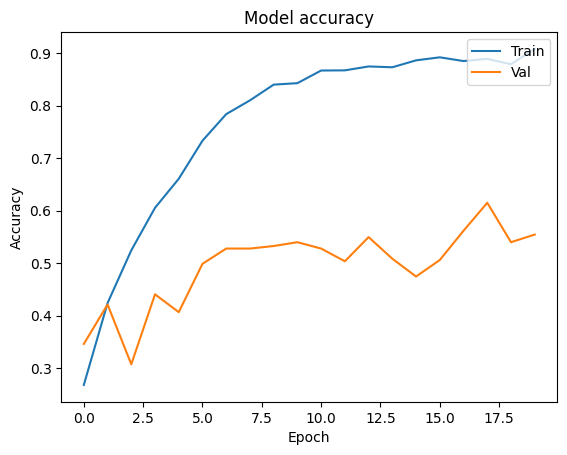

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Extract true labels
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())

# Convert list of true labels to a NumPy array
true_labels = np.array(true_labels)

# Get predictions
predictions = np.argmax(model.predict(test_ds), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)

# Optionally, print the classification report for more metrics
print("\nClassification Report:")
print(classification_report(true_labels, predictions))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Confusion Matrix:
[[0 0 0 1 2 2 2 1 1 1 2 1 1 0 5 0 1]
 [0 2 0 0 2 2 2 2 0 0 2 0 2 1 3 0 2]
 [0 2 1 0 0 2 1 3 0 1 1 4 1 0 4 0 0]
 [0 0 0 2 0 1 1 1 0 3 1 0 4 1 3 2 1]
 [0 1 0 1 0 2 3 2 1 2 3 2 1 0 2 0 2]
 [1 0 0 0 1 0 1 2 4 0 2 0 1 3 1 1 3]
 [0 0 0 1 2 3 3 3 1 2 2 0 0 2 2 1 2]
 [0 0 2 0 1 3 5 3 1 1 0 0 0 1 2 0 2]
 [0 2 0 0 0 2 1 2 3 1 3 1 2 0 4 2 1]
 [1 2 0 1 3 4 3 1 1 0 3 0 0 1 2 2 0]
 [1 0 1 0 2 3 0 2 0 2 0 3 2 0 7 0 1]
 [0 0 1 0 1 3 3 1 1 2 1 4 0 1 4 2 0]
 [0 1 2 0 0 1 4 6 4 3 0 0 0 0 0 0 3]
 [1 3 2 1 1 2 0 1 3 2 1 0 1 0 5 0 1]
 [0 2 0 1 1 0 1 2 1 1 2 1 1 3 1 1 2]
 [0 0 1 1 1 0 1 4 1 1 0 3 4 1 4 0 2]
 [0 0 1 0 0 2 2 3 0 2 4 1 2 0 3 0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.13      0.10      0.11        20
           2       0.09      0.05      0.06        20
           3       0.22      0.10      0.14        20
           4     

In [19]:
optimizer1 = keras.optimizers.Adam(learning_rate=0.0001)
optimizer2 = keras.optimizers.Adam(learning_rate=0.001)
optimizer3 = keras.optimizers.Adam(learning_rate=0.01)
optimizer4 = keras.optimizers.Adam(learning_rate=0.1)

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9234 - loss: 4.6788 - val_accuracy: 0.6247 - val_loss: 5.5262
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9523 - loss: 3.7489 - val_accuracy: 0.6223 - val_loss: 4.8939
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9781 - loss: 3.1502 - val_accuracy: 0.6295 - val_loss: 4.3876
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9808 - loss: 2.7151 - val_accuracy: 0.6368 - val_loss: 3.9968
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9854 - loss: 2.3663 - val_accuracy: 0.6465 - val_loss: 3.7390
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9852 - loss: 2.0698 - val_accuracy: 0.6416 - val_loss: 3.4738
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9875 - loss: 1.8102 - val_accuracy: 0.6320 - val_loss: 3.3500
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9889 - loss: 1.5936 - val_acc

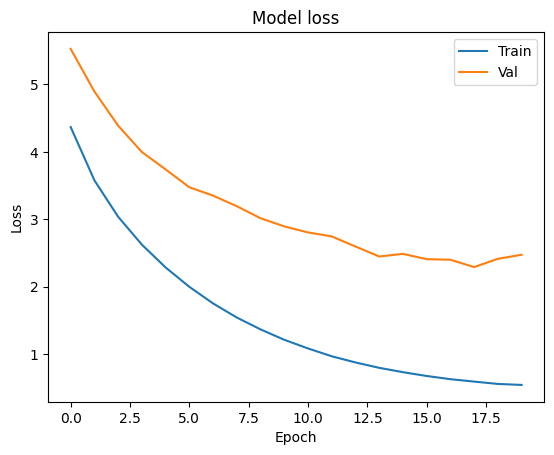

In [20]:
model.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(train_ds, validation_data=val_ds, epochs=20)

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.8083 - loss: 1.9726 - val_accuracy: 0.5496 - val_loss: 7.0931
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8345 - loss: 4.2863 - val_accuracy: 0.6247 - val_loss: 6.0163
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9180 - loss: 3.9054 - val_accuracy: 0.6126 - val_loss: 5.3904
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9474 - loss: 3.4758 - val_accuracy: 0.6053 - val_loss: 5.1672
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9396 - loss: 3.4195 - val_accuracy: 0.6005 - val_loss: 5.5678
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9158 - loss: 3.8161 - val_accuracy: 0.5714 - val_loss: 6.0932
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9104 - loss: 4.1624 - val_accuracy: 0.5714 - val_loss: 6.2596
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9209 - loss: 4.4665 - val_acc

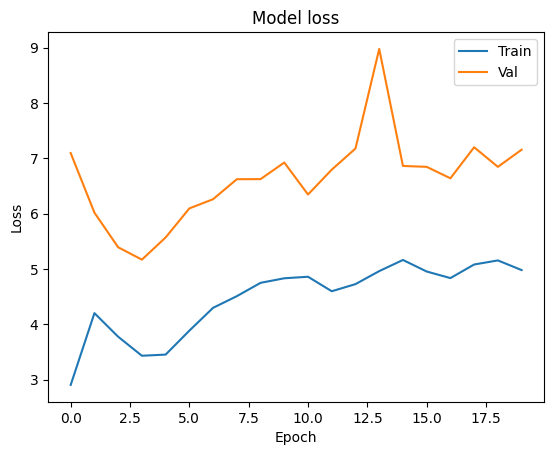

In [21]:
model.compile(optimizer=optimizer2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(train_ds, validation_data=val_ds, epochs=20)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.2867 - loss: 21.0101 - val_accuracy: 0.2542 - val_loss: 12.2865
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.3141 - loss: 10.9828 - val_accuracy: 0.2954 - val_loss: 11.6298
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.3178 - loss: 11.0165 - val_accuracy: 0.2324 - val_loss: 11.3918
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.3511 - loss: 10.6640 - val_accuracy: 0.3002 - val_loss: 10.3580
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.3590 - loss: 10.0925 - val_accuracy: 0.3196 - val_loss: 11.1810
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.3569 - loss: 10.6592 - val_accuracy: 0.1356 - val_loss: 18.3594
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.3662 - loss: 10.5220 - val_accuracy: 0.2639 - val_loss: 11.0544
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.3628 - loss: 10

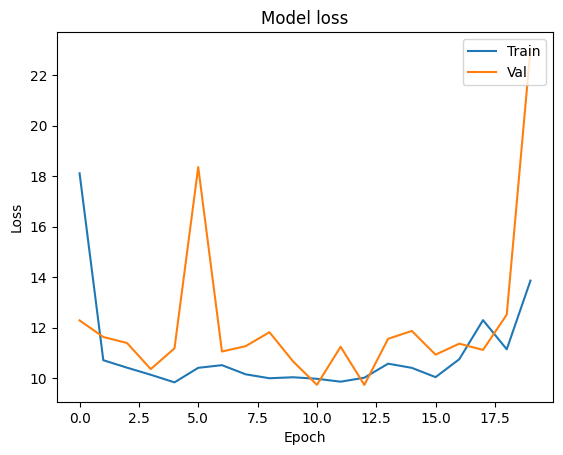

In [22]:
model.compile(optimizer=optimizer3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model.fit(train_ds, validation_data=val_ds, epochs=20)

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.1020 - loss: 37.1141 - val_accuracy: 0.0508 - val_loss: 26.2456
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.1126 - loss: 23.3144 - val_accuracy: 0.0630 - val_loss: 50.0922
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.0926 - loss: 78.0017 - val_accuracy: 0.0847 - val_loss: 95.7130
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.0924 - loss: 108.7934 - val_accuracy: 0.0654 - val_loss: 160.6619
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.0949 - loss: 103.3170 - val_accuracy: 0.0339 - val_loss: 116.8529
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.0951 - loss: 126.3601 - val_accuracy: 0.0678 - val_loss: 109.4424
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.1033 - loss: 137.8654 - val_accuracy: 0.1017 - val_loss: 182.2285
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.1010 - 

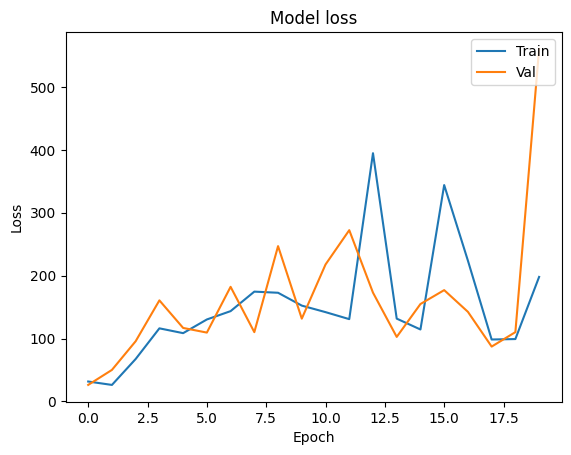

In [23]:
model.compile(optimizer=optimizer4, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history4 = model.fit(train_ds, validation_data=val_ds, epochs=20)

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**The best model has 0.0001 learning rate and 99% training accuracy and 65% validation accuracy**